## Week 2 assignment

#### Objectives

The objectives of this assignment are:

1. to try out different model architectures
2. to experiment with different kinds of regularization

#### Dataset

California housing dataset from keras

#### Task

In the course material, a neural network is trained and tested to have the mean average error of approximately 0,3 (in units of 100000$), when computed with the test set containing 20% of the available labeled data. Your task is to try out some strategies for obtaining a better model, and try to achieve a lower MAE than the above.

Prepare a Jupyter notebook containing an account of the problem treatment. You do not have to present all the different experiments you have performed in detail: a short mention of the various trials is enough. However, the training and subsequent testing of the finally selected model must be presented in the notebook.

Note the following:

- You should use three separate datasets: training, validation, and test sets.
- Check out a few different model architectures (e.g. change the number of neurons in the hidden layers).
- Select the model with optimal architecture among the ones you tried. Ideally, the model should still show some signs of - - overfitting (to make sure it has enough predictive power).
- Try out some of the strategies for reducing overfitting, and pick the one leading to the most promising results.
- Train the final model once more with training and validation sets combined, and evaluate it with the test set.
- Use markdown cells to document your work.





#### Data preparation

This block I import california housing dataset from keras and split it in training and testing dataset. When fitting the model I am using validation_Split inside that fitting function.

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.datasets import california_housing
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras import callbacks

(x_train, y_train), (x_test, y_test) = california_housing.load_data(version='small', test_split=0.2)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(480, 8) (480,)
(120, 8) (120,)


##### This block standardizes training dataset.

In [41]:
# mean and standard deviation computed from training set only
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train -= mean
x_train /= std
x_test -= mean
x_test /= std
y_train /= 1e5
y_test /= 1e5

#### Modeling

This block contains early_stop function to stop learn of the model if it detects over fitting.

In [42]:
# Callback for early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=40,
    min_delta=0.001,
    restore_best_weights=True
)

# Defining model layers
model = Sequential([
    Input(shape=(8,)),
    Dense(512, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu', kernel_regularizer=l2(0.02)),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.03)),
    BatchNormalization(),
    Dense(1)
])

#Model compiling
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 512)                 │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,505 (709.00 KB)

 Trainable params: 179,329 (700.50 KB)

 Non-trainable params: 2,176 (8.50 KB)

In [43]:
# Fitting the model
history = model.fit(x_train, y_train, epochs=550, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stop])

Epoch 1/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 23.3234 - mae: 2.2736 - val_loss: 19.7580 - val_mae: 1.9337
Epoch 2/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.5371 - mae: 2.1601 - val_loss: 19.4090 - val_mae: 1.8528
Epoch 3/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.5780 - mae: 2.0570 - val_loss: 19.0730 - val_mae: 1.7679
Epoch 4/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.6142 - mae: 2.0528 - val_loss: 18.7802 - val_mae: 1.6939
Epoch 5/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.2032 - mae: 2.0191 - val_loss: 18.5411 - val_mae: 1.6318
Epoch 6/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.5004 - mae: 2.0795 - val_loss: 18.2907 - val_mae: 1.5635
Epoch 7/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.0645 - mae: 1.9878 - val_loss: 18.0786 - val_mae: 1.5015
Epoch 8/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 20.1297 - mae: 2.0496 - val_loss: 17.9028 - val_mae: 1.4508
Epoch 9/550
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

#### Visualization

I plot results in two plots. First one is train loss and valuation loss. Second one is train MAE (Mean absolute error) and valuation MAE. I also print best results of valuation MAE and valuation loss below.

Best validation loss: 0.81
Best validation mae: 0.28


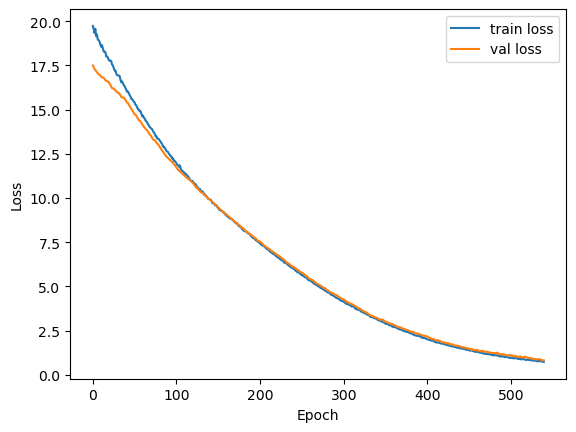

In [44]:
# Result plot of loss
plt.plot(history.history['loss'][10:], label='train loss')
plt.plot(history.history['val_loss'][10:], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Validation result printings to 2 decimal
best_val_loss = min(history.history['val_loss'])
best_val_mae = min(history.history['val_mae'])
print(f'Best validation loss: {best_val_loss:.2f}')
print(f'Best validation mae: {best_val_mae:.2f}')

Text(0, 0.5, 'Mean absolute error (in 100000 $)')

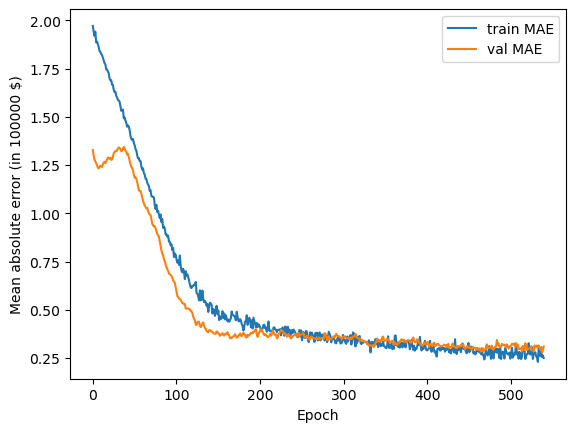

In [45]:
# Result plot of MAE
plt.plot(history.history['mae'][10:], label='train MAE')
plt.plot(history.history['val_mae'][10:], label='val MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')

#### Summary

The training loss decreases steadily over epochs, indicating that the model is learning. However, the validation loss stabilizes after a certain point, suggesting the model may be approaching its optimal performance.

The model performed well on the training data, but there is a slight gap between training and validation loss, indicating potential over fitting.

After experimenting lot of different values to get validation MAE below 0.3 I found that kernel_regularization and chancing adam optimizer value to 0.0001 from default 0.001 gave me the best result and got me to ~0.28 validation mean absolute error.

And lastly I fit model with all data below.

In [46]:
# Fit with all data
history = model.fit(x_train, y_train, epochs=550, batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7460 - mae: 0.2547 
Epoch 2/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7710 - mae: 0.2993 
Epoch 3/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7632 - mae: 0.2842 
Epoch 4/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7728 - mae: 0.2975 
Epoch 5/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7335 - mae: 0.2669 
Epoch 6/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7496 - mae: 0.3061 
Epoch 7/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7025 - mae: 0.2425 
Epoch 8/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7729 - mae: 0.3131 
Epoch 9/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6986 - mae: 0.2572 
Epoch 10/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7603 - mae: 0.3263 
Epoch 11/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7022 - mae: 0.2722 
Epoch 12/550
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7818 - mae: 0.3514 
Epoch 13/550
15/15 ━━━━━━

Best validation mae: 0.17


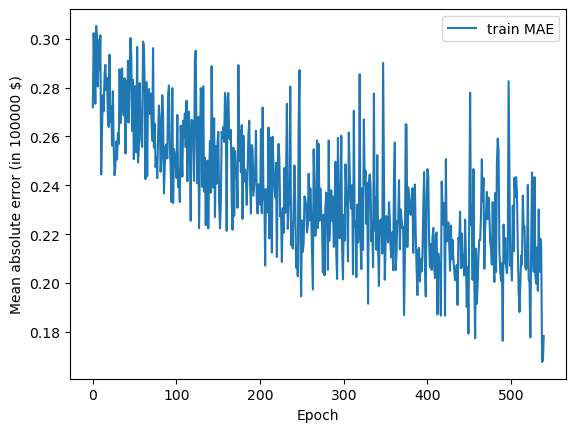

In [47]:
# Final plot of validation mae
plt.plot(history.history['mae'][10:], label='train MAE')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Mean absolute error (in 100000 $)')

best_mae = min(history.history['mae'])
print(f'Best validation mae: {best_mae:.2f}')

Best validation loss: 0.10


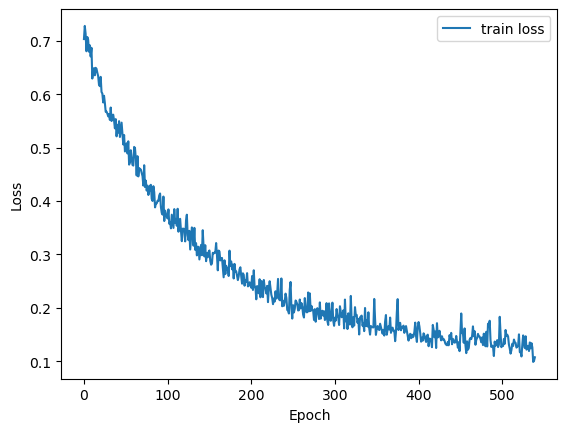

In [48]:
# Final plot of loss
plt.plot(history.history['loss'][10:], label='train loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')

best_loss = min(history.history['loss'])
print(f'Best validation loss: {best_loss:.2f}')